## ANALIZA TELEMETRII BOLIDU F1
# Cel - próba określenia jaką strategię przyjmuje kierowca, w jakiej fazie wyścigu jest. Czy naciska czy może oszczędza opony?

# Wstępna charakterystyka, Przygotowanie danych

Pobieramy dane dotyczące pierwszego GP w 2023 roku - Bahrainu. Uzyskujemy Listę wszystkich sesji, Practice 1, Practice 2, Sprint, Race etc.

In [ ]:
df_telemetry = telemetry_preprocessing().join_frames_by_date(df_race_location_data, df_race_car_data)

df_telemetry = df_telemetry[~df_telemetry["date"].isna()]

df_telemetry_test  = df_telemetry.copy()

df_telemetry_test["lap"] = 0


i = 1
for index, row in df_race_laps_data.iloc[1:10, :].iterrows(): 
    
        if i == 1:
            timestamp_end = row["date_start"]
            end_index = telemetry_preprocessing().data_closest_timestamp(timestamp_end, df_telemetry) 
            df_telemetry_test.loc[:end_index+1, "lap"] = i 
            timestamp_start = timestamp_end
            i += 1
            continue
        
        start_index = telemetry_preprocessing().data_closest_timestamp(timestamp_start, df_telemetry) 
        timestamp_end = row["date_start"]
        end_index = telemetry_preprocessing().data_closest_timestamp(timestamp_end, df_telemetry) 
        df_telemetry_test.loc[start_index:end_index+1, "lap"] = i 
        
        timestamp_start = timestamp_end
        
        i += 1
        
        
ref_time = df_telemetry_test["date"].iloc[0]  
df_telemetry_test["delta"] = df_telemetry_test["date"].apply(
    lambda x: (x - ref_time).total_seconds()
)


lon, lat = telemetry_computations().compute_accelerations(telemetry=telemetry)


telemetry.DRS = telemetry.DRS.apply(lambda x: 1 if x in [10, 12, 14] else 0)

plt.plot(telemetry.DRS)



import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from telemetry_data_preprocessing import request_data, telemetry_computations, telemetry_preprocessing
import fastf1

computations = telemetry_computations()
request = request_data()

driver_number = "1"
country_name = "Bahrain"
year = "2023"

sessions_data = []

for session in sessions_data:
    match session["session_name"]:
        case "Qualifying":
            
            params = {
                "driver_number" : driver_number,
                "session_key" : session["session_key"]
            }
            qualifying_car_data = request.get_car_data(params=params)
            print("got quali car data..")
            qualifying_location_data = request.get_location_data(params=params)
            print("got quali location data..")
            qualifying_laps_data = request.get_laps_data(params=params)
            print("got quali laps data..")
            
        case "Race":
            
            params = {
                "driver_number" : driver_number,
                "session_key" : session["session_key"]
            }
            race_car_data = request.get_car_data(params=params)
            print("got race car data..")
            race_location_data = request.get_location_data(params=params)
            print("got race location data..")
            race_laps_data = request.get_laps_data(params=params)
            print("got race laps data..")
            
            
df_qualifying_car_data = pd.DataFrame(qualifying_car_data)
## ....
## ....
## ....
           
df_qualifying_car_data = df_qualifying_car_data.iloc[:, 1:-2]

df_qualifying_car_data['date'] = pd.to_datetime(df_qualifying_car_data['date'], format='ISO8601')

df_qualifying_car_data['drs'] = df_qualifying_car_data['drs'].apply(lambda x: 1 if x in [10, 12, 14] else 0)


df_qualifying_laps_data["date_start"] = pd.to_datetime(df_qualifying_laps_data["date_start"], format='ISO8601')

df_qualifying_laps_data["lap_duration"] = pd.to_timedelta(df_qualifying_laps_data["lap_duration"], unit="s")


df_race_car_data = df_race_car_data.iloc[:, 1:-2]

df_race_car_data['date'] = pd.to_datetime(df_race_car_data['date'], format='ISO8601')

df_race_car_data['drs'] = df_race_car_data['drs'].apply(lambda x: 1 if x in [10, 12, 14] else 0)

df_race_laps_data["date_start"] = pd.to_datetime(df_race_laps_data["date_start"], format='ISO8601')

df_race_laps_data["lap_duration"] = pd.to_timedelta(df_race_laps_data["lap_duration"], unit="s")

df_race_location_data["date"] = pd.to_datetime(df_race_location_data['date'], format='ISO8601')

NameError: name 'telemetry_preprocessing' is not defined

In [2]:
import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from telemetry_data_preprocessing import telemetry_computations, telemetry_preprocessing
import fastf1
import fastf1.logger

fastf1.logger.set_log_level('ERROR')

computations = telemetry_computations()

fastf1.Cache.enable_cache('fastf1_cache')

driver_number = "1"
country_name = "Bahrain"
year = 2023

In [3]:
session = fastf1.get_session(year, country_name, 'Q') 
session.load()  

quali_laps = session.laps.pick_driver(driver_number)
quali_car_data = session.car_data[driver_number]
quali_pos_data = session.pos_data[driver_number]

race = fastf1.get_session(year, country_name, 'R')  
race.load()

race_laps = race.laps.pick_driver(driver_number)
race_car_data = race.car_data[driver_number]
race_pos_data = race.pos_data[driver_number]

c:\Users\Patryk\.conda\envs\f1proj\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\Patryk\.conda\envs\f1proj\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Pobieramy telemetrię bolidu dla wybranego kierowcy, w tym wypadku Maxa Verstappena (numer 1). Funkcja zwraca dane bolidu i czasów okrążeń dotyczące treningu i wyścigu.

Wrzucamy dane do DataFrame, usuwamy zbędne kolumny i parsujemy datę do poprawnego formatu

In [4]:
laps = race.laps.pick_driver('VER')

telemetry_list = []

for index, lap in laps.iterlaps():
    telemetry = lap.get_telemetry()
    telemetry['LapNumber'] = lap['LapNumber']
    
    telemetry_list.append(telemetry)
    
telemetry = pd.concat(telemetry_list)

In [5]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z,LapNumber
2,2023-03-05 15:03:38.501,0 days 01:02:36.652000,,0.155556,0 days 00:00:00,10076.374938,0.000000,1,16.0,False,1,interpolation,0.000194,3.748547e-08,OnTrack,-279.999631,3558.983052,-156.999885,1.0
3,2023-03-05 15:03:38.611,0 days 01:02:36.762000,,0.155556,0 days 00:00:00.110000,10130.000000,0.000000,1,16.0,False,1,car,0.000000,0.000000e+00,OnTrack,-279.999617,3558.982418,-156.999881,1.0
4,2023-03-05 15:03:38.686,0 days 01:02:36.837000,,0.155556,0 days 00:00:00.185000,9993.499884,0.000000,1,16.0,False,1,pos,-0.000268,-5.186355e-08,OnTrack,-280.000000,3559.000000,-157.000000,1.0
5,2023-03-05 15:03:38.811,0 days 01:02:36.962000,,0.155556,0 days 00:00:00.310000,9766.000000,0.000000,1,16.0,False,1,car,0.000000,0.000000e+00,OnTrack,-280.001327,3559.060983,-157.000413,1.0
6,2023-03-05 15:03:38.946,0 days 01:02:37.097000,,0.155556,0 days 00:00:00.445000,8956.001152,0.964284,1,16.0,False,1,pos,0.003325,6.439951e-07,OnTrack,-280.000000,3559.000000,-157.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-03-05 16:37:34.828,0 days 02:36:32.979000,,NaN,0 days 00:01:35.733000,10525.000000,271.000000,7,0.0,True,0,car,5322.452222,9.914971e-01,OnTrack,-407.146267,742.650673,-158.999991,57.0
740,2023-03-05 16:37:35.005,0 days 02:36:33.156000,,NaN,0 days 00:01:35.910000,10218.568861,263.256253,7,0.0,True,0,pos,5335.352916,9.939003e-01,OnTrack,-400.000000,881.000000,-159.000000,57.0
741,2023-03-05 16:37:35.148,0 days 02:36:33.299000,,NaN,0 days 00:01:36.053000,9971.000000,257.000000,7,0.0,True,0,car,5345.296667,9.957527e-01,OnTrack,-394.385089,984.164803,-159.000000,57.0
742,2023-03-05 16:37:35.185,0 days 02:36:33.336000,,NaN,0 days 00:01:36.090000,9861.233523,254.019450,7,0.0,True,0,pos,5347.787384,9.962167e-01,OnTrack,-393.000000,1010.000000,-159.000000,57.0


In [6]:
telemetry = telemetry.drop(["DriverAhead", "RPM", "Source", "Status", "RelativeDistance"], axis = 1)

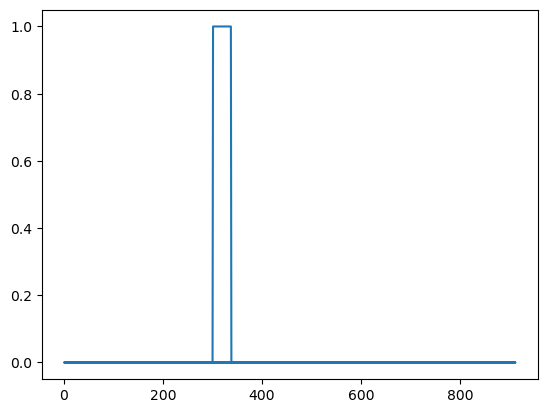

In [7]:
telemetry.DRS = telemetry.DRS.apply(lambda x: 1 if x in [10, 12, 14] else 0)

plt.plot(telemetry.DRS)

In [72]:
telemetry

,Date,SessionTime,DistanceToDriverAhead,Time,Speed,nGear,Throttle,Brake,DRS,Distance,X,Y,Z,LapNumber
2,2023-03-05 15:03:38.501,0 days 01:02:36.652000,0.155556,0 days 00:00:00,0.000000,1,16.0,False,0,0.000194,-279.999631,3558.983052,-156.999885,1.0
3,2023-03-05 15:03:38.611,0 days 01:02:36.762000,0.155556,0 days 00:00:00.110000,0.000000,1,16.0,False,0,0.000000,-279.999617,3558.982418,-156.999881,1.0
4,2023-03-05 15:03:38.686,0 days 01:02:36.837000,0.155556,0 days 00:00:00.185000,0.000000,1,16.0,False,0,-0.000268,-280.000000,3559.000000,-157.000000,1.0
5,2023-03-05 15:03:38.811,0 days 01:02:36.962000,0.155556,0 days 00:00:00.310000,0.000000,1,16.0,False,0,0.000000,-280.001327,3559.060983,-157.000413,1.0
6,2023-03-05 15:03:38.946,0 days 01:02:37.097000,0.155556,0 days 00:00:00.445000,0.964284,1,16.0,False,0,0.003325,-280.000000,3559.000000,-157.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-03-05 16:37:34.828,0 days 02:36:32.979000,NaN,0 days 00:01:35.733000,271.000000,7,0.0,True,0,5322.452222,-407.146267,742.650673,-158.999991,57.0
740,2023-03-05 16:37:35.005,0 days 02:36:33.156000,NaN,0 days 00:01:35.910000,263.256253,7,0.0,True,0,5335.352916,-400.000000,881.000000,-159.000000,57.0
741,2023-03-05 16:37:35.148,0 days 02:36:33.299000,NaN,0 days 00:01:36.053000,257.000000,7,0.0,True,0,5345.296667,-394.385089,984.164803,-159.000000,57.0
742,2023-03-05 16:37:35.185,0 days 02:36:33.336000,NaN,0 days 00:01:36.090000,254.019450,7,0.0,True,0,5347.787384,-393.000000,1010.000000,-159.000000,57.0


In [8]:
telemetry_test = telemetry.copy()

In [9]:
telemetry_test["mean_lap_speed"] = telemetry_test.groupby(by = "LapNumber")["Speed"].transform("mean")

telemetry_test

,Date,SessionTime,DistanceToDriverAhead,Time,Speed,nGear,Throttle,Brake,DRS,Distance,X,Y,Z,LapNumber,mean_lap_speed
2,2023-03-05 15:03:38.501,0 days 01:02:36.652000,0.155556,0 days 00:00:00,0.000000,1,16.0,False,0,0.000194,-279.999631,3558.983052,-156.999885,1.0,185.815557
3,2023-03-05 15:03:38.611,0 days 01:02:36.762000,0.155556,0 days 00:00:00.110000,0.000000,1,16.0,False,0,0.000000,-279.999617,3558.982418,-156.999881,1.0,185.815557
4,2023-03-05 15:03:38.686,0 days 01:02:36.837000,0.155556,0 days 00:00:00.185000,0.000000,1,16.0,False,0,-0.000268,-280.000000,3559.000000,-157.000000,1.0,185.815557
5,2023-03-05 15:03:38.811,0 days 01:02:36.962000,0.155556,0 days 00:00:00.310000,0.000000,1,16.0,False,0,0.000000,-280.001327,3559.060983,-157.000413,1.0,185.815557
6,2023-03-05 15:03:38.946,0 days 01:02:37.097000,0.155556,0 days 00:00:00.445000,0.964284,1,16.0,False,0,0.003325,-280.000000,3559.000000,-157.000000,1.0,185.815557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-03-05 16:37:34.828,0 days 02:36:32.979000,NaN,0 days 00:01:35.733000,271.000000,7,0.0,True,0,5322.452222,-407.146267,742.650673,-158.999991,57.0,200.748140
740,2023-03-05 16:37:35.005,0 days 02:36:33.156000,NaN,0 days 00:01:35.910000,263.256253,7,0.0,True,0,5335.352916,-400.000000,881.000000,-159.000000,57.0,200.748140
741,2023-03-05 16:37:35.148,0 days 02:36:33.299000,NaN,0 days 00:01:36.053000,257.000000,7,0.0,True,0,5345.296667,-394.385089,984.164803,-159.000000,57.0,200.748140
742,2023-03-05 16:37:35.185,0 days 02:36:33.336000,NaN,0 days 00:01:36.090000,254.019450,7,0.0,True,0,5347.787384,-393.000000,1010.000000,-159.000000,57.0,200.748140


In [10]:
telemetry["last_10_EMA"] = telemetry["Speed"].ewm(span=10).mean()
telemetry["last_5_EMA"] = telemetry["Speed"].ewm(span=5).mean()
telemetry["last_10_SMA"] = telemetry["Speed"].rolling(window=10).mean()
telemetry["last_5_SMA"] = telemetry["Speed"].rolling(window=5).mean()

In [11]:
telemetry

,Date,SessionTime,DistanceToDriverAhead,Time,Speed,nGear,Throttle,Brake,DRS,Distance,X,Y,Z,LapNumber,last_10_EMA,last_5_EMA,last_10_SMA,last_5_SMA
2,2023-03-05 15:03:38.501,0 days 01:02:36.652000,0.155556,0 days 00:00:00,0.000000,1,16.0,False,0,0.000194,-279.999631,3558.983052,-156.999885,1.0,0.000000,0.000000,NaN,NaN
3,2023-03-05 15:03:38.611,0 days 01:02:36.762000,0.155556,0 days 00:00:00.110000,0.000000,1,16.0,False,0,0.000000,-279.999617,3558.982418,-156.999881,1.0,0.000000,0.000000,NaN,NaN
4,2023-03-05 15:03:38.686,0 days 01:02:36.837000,0.155556,0 days 00:00:00.185000,0.000000,1,16.0,False,0,-0.000268,-280.000000,3559.000000,-157.000000,1.0,0.000000,0.000000,NaN,NaN
5,2023-03-05 15:03:38.811,0 days 01:02:36.962000,0.155556,0 days 00:00:00.310000,0.000000,1,16.0,False,0,0.000000,-280.001327,3559.060983,-157.000413,1.0,0.000000,0.000000,NaN,NaN
6,2023-03-05 15:03:38.946,0 days 01:02:37.097000,0.155556,0 days 00:00:00.445000,0.964284,1,16.0,False,0,0.003325,-280.000000,3559.000000,-157.000000,1.0,0.276820,0.370176,NaN,0.192857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-03-05 16:37:34.828,0 days 02:36:32.979000,NaN,0 days 00:01:35.733000,271.000000,7,0.0,True,0,5322.452222,-407.146267,742.650673,-158.999991,57.0,268.687859,270.798493,269.845625,271.447778
740,2023-03-05 16:37:35.005,0 days 02:36:33.156000,NaN,0 days 00:01:35.910000,263.256253,7,0.0,True,0,5335.352916,-400.000000,881.000000,-159.000000,57.0,267.700294,268.284413,269.571251,269.499028
741,2023-03-05 16:37:35.148,0 days 02:36:33.299000,NaN,0 days 00:01:36.053000,257.000000,7,0.0,True,0,5345.296667,-394.385089,984.164803,-159.000000,57.0,265.754786,264.522942,268.571251,266.651251
742,2023-03-05 16:37:35.185,0 days 02:36:33.336000,NaN,0 days 00:01:36.090000,254.019450,7,0.0,True,0,5347.787384,-393.000000,1010.000000,-159.000000,57.0,263.621089,261.021778,267.237015,263.255140


In [14]:
circuitinfo = session.get_circuit_info()

circuitinfo.corners

,X,Y,Number,Letter,Angle,Distance
0,42.405939,8329.202564,1,,-246.615311,703.535450
1,820.781621,7879.043841,2,,-101.177469,803.115190
2,1912.969997,8065.442167,3,,-261.394562,918.182146
3,7487.745293,6790.710716,4,,-349.599066,1498.527640
4,5820.228443,4860.740936,5,,-211.501597,1763.418513
5,5180.404121,4214.598861,6,,-76.374442,1879.014089
6,4276.202937,4156.240631,7,,-258.953372,1964.725514
7,2490.099011,2458.600397,8,,-114.654309,2211.163474
8,2711.155288,5950.242339,9,,-344.907956,2593.469175
9,2100.132716,6613.999851,10,,-270.022000,2664.101908


Z jakiegoś powodu w aktywność drs jest określona w danych na 9 różnych sposobów, w naszej analizie wystarczy nam informacja czy drs jest otwarty, czy też nie, więc tak je normalizujemy

Mimo że throttle i brake powinny zawierać się w wartościach 0-100, dochodzą one do 104

In [ ]:
df_qualifying_car_data.describe()

,rpm,speed,n_gear,throttle,brake,drs
count,19732.000000,19732.000000,19732.000000,19732.000000,19732.000000,19732.000000
mean,3402.376799,55.707531,1.352727,32.164099,25.424488,0.023768
std,4530.305827,85.081004,2.139229,43.966542,44.334970,0.152331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8570.000000,109.000000,2.000000,85.000000,0.000000,0.000000
max,12260.000000,324.000000,8.000000,104.000000,104.000000,1.000000


Jest to problem cykliczny, wygląda jakby następował po powrocie bolidu do garażu, być może w taki sposób jest sygnalizowany postój w garażu i brak dostępu do danych

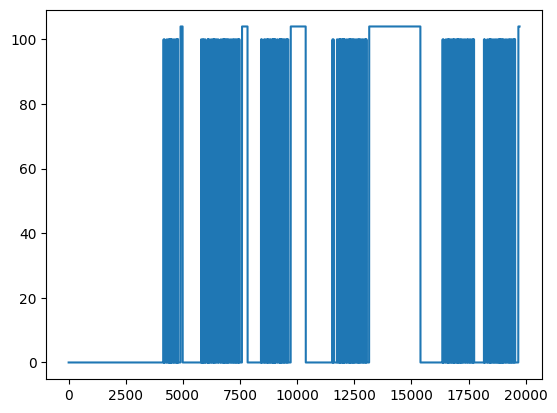

In [ ]:
plt.plot(df_qualifying_car_data["brake"])

Widzimy pojedyńcze okrążenie, a następnie okres z wartością 104, postaramy się po prostu omijać te okresy, zresztą powinno przyjść nam to naturalnie przy wybieraniu czasów okrążeń (zaraz będzie to jasne).

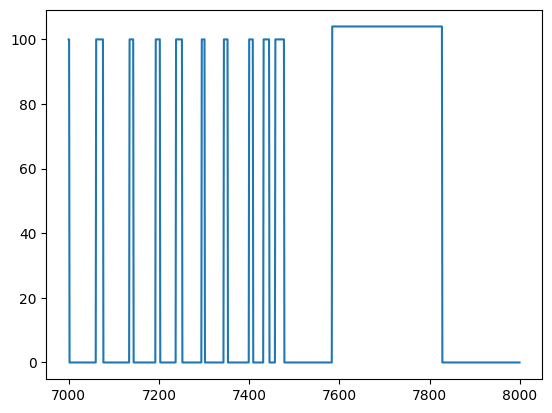

In [ ]:
plt.plot(df_qualifying_car_data["brake"][7000:8000])

Teraz zajmiemy się danymi okrążeń, i spróbujemy na ich podstawie wyszczególnić w danych bolidu czas rozpoczęcia i zakończenia okrążenia. Na początek zaczniemy od sformatowania danych

Widzimy, iż kolumna is_pit_out_lap wskazuje, iż dwa pierwsze zarejestrowane okrążenia były przygotowujące, więc nie będziemy ich brać pod uwagę i zajmiemy się 3 okrążeniem, które jest tym właściwym 

W ten sposób uzyskujemy czas rozpoczęcia okrążenia kwalifikacyjnego

In [ ]:
df_qualifying_laps_data["date_start"][2]

Timestamp('2023-03-04 15:14:33.390000+0000', tz='UTC')

W celu znalezienia timestampu, tworzymy funkcję, która na podstawie najmniejszej absolutnej różnicy, wybiera dla nas index wiersza z qualifying_car_data

In [ ]:
lap1start_time = df_qualifying_laps_data["date_start"][2]


Otrzymujemy index okrążenia startowego, możemy dla pewności sprawdzić czas

In [ ]:
qualifying_start_lap_index = data_closest_timestamp(lap1start_time, df_qualifying_car_data)

qualifying_start_lap_index

6689

In [ ]:
df_qualifying_car_data["date"][qualifying_start_lap_index]

Timestamp('2023-03-04 15:14:33.486000+0000', tz='UTC')

Nie jest to idealny wybór, musimy zaakceptować stratę (a bardziej korektę czasów) 0.096s, na razie nie będziemy tego korygować

In [ ]:
df_qualifying_car_data["date"][qualifying_start_lap_index] - df_qualifying_laps_data["date_start"][2]

Timedelta('0 days 00:00:00.096000')

Teraz chcemy znaleźć index zakońćzenia, w tym celu dodamy do czasu startu czas okrążenia pobrany z tabeli df_qualifying_laps_data i postąpimy analogicznie jak w przypadku poszukiwania indexu startowego

In [ ]:
df_qualifying_laps_data["lap_duration"][2]

Timedelta('0 days 00:01:31.295000')

In [ ]:
qualifying_end_lap_index = telemetry_preprocessing().data_closest_timestamp(lap1start_time + df_qualifying_laps_data["lap_duration"][2], df_qualifying_car_data)

qualifying_end_lap_index

7033

Konwertujemy czas na względny od rozpoczęcia okrążenia, tak aby wyświetlać czas w sekunach a nie godziny zegarowe w których odbywało się okrążenie, nie miałoby to większego sensu

In [ ]:
start_time = df_qualifying_car_data["date"][qualifying_start_lap_index]
df_qualifying_time = df_qualifying_car_data["date"][qualifying_start_lap_index:qualifying_end_lap_index].apply(lambda x: (x - start_time).total_seconds())

df_qualifying_time

6689     0.00
6690     0.28
6691     0.56
6692     0.76
6693     1.08
        ...  
7028    89.84
7029    90.08
7030    90.28
7031    90.60
7032    90.80
Name: date, Length: 344, dtype: float64

W ten sposób docieramy do pierwszych wykresów, na których widać kolejno czas, brake i throttle w zależności od czasu okrążenia

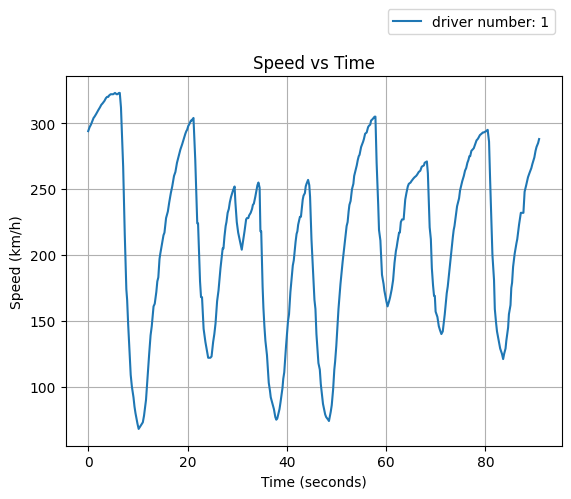

In [ ]:
plt.plot(df_qualifying_time,  df_qualifying_car_data["speed"][qualifying_start_lap_index:qualifying_end_lap_index])

plt.legend([f"driver number: {driver_number}"], bbox_to_anchor=(1.0, 1.20), ncol=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Speed (km/h)")
plt.title("Speed vs Time")
plt.grid(True)
plt.show()

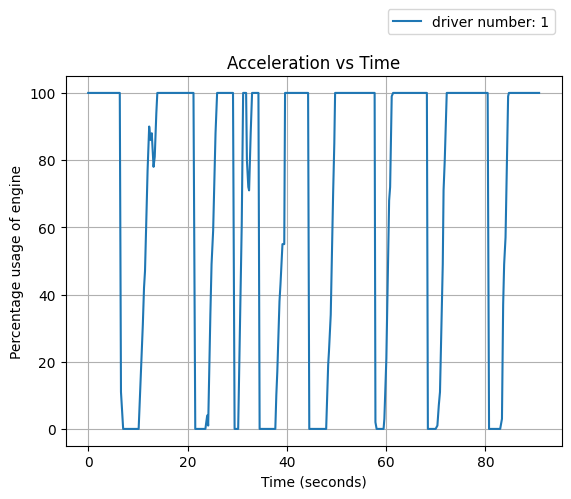

In [ ]:
plt.plot(df_qualifying_time,  df_qualifying_car_data["throttle"][qualifying_start_lap_index:qualifying_end_lap_index])

plt.legend([f"driver number: {driver_number}"], bbox_to_anchor=(1.0, 1.20), ncol=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Percentage usage of engine")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.show()

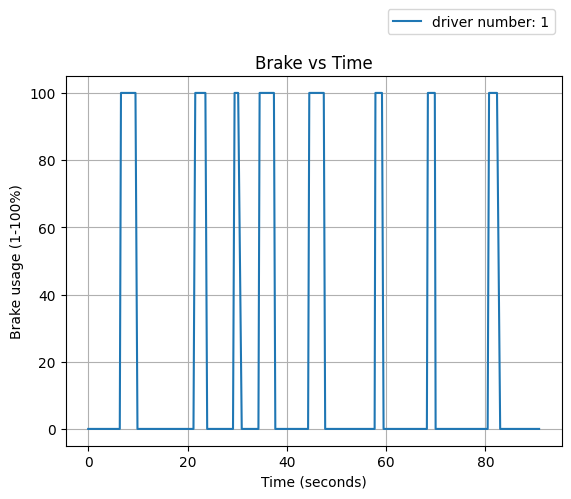

In [ ]:
plt.plot(df_qualifying_time,  df_qualifying_car_data["brake"][qualifying_start_lap_index:qualifying_end_lap_index])

plt.legend([f"driver number: {driver_number}"], bbox_to_anchor=(1.0, 1.20), ncol=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Brake usage (1-100%)")
plt.title("Brake vs Time")
plt.grid(True)
plt.show()

Stworzenie funkcji aproksymującej pochodną wykresu (throttle, brake, speed, etc), dzięki czemu badać będzie można dynamikę wykresu i go porównywać (still in progress)

No coś się liczy niby nie, zera wynikaja z tego ze jest zerowe zużycie throttle czasem

In [ ]:
def compute_telemetry_derivative(telemetry):
    
        dx = telemetry_computations.smooth_derivative(telemetry["date"][qualifying_start_lap_index:qualifying_end_lap_index].apply(lambda x: (x - start_time).total_seconds())  ,telemetry["throttle"][qualifying_start_lap_index:qualifying_end_lap_index])
        return dx

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


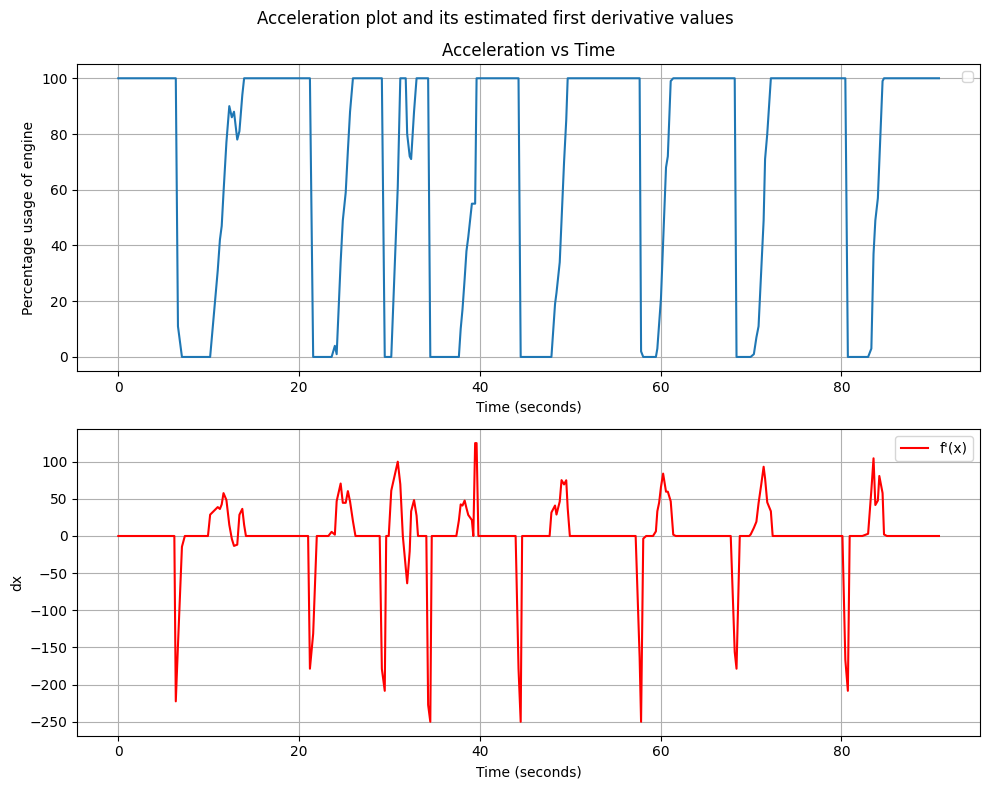

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Acceleration plot and its estimated first derivative values')

# Wykres funkcji
ax1.plot(df_qualifying_time,  df_qualifying_car_data["throttle"][qualifying_start_lap_index:qualifying_end_lap_index])
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Percentage usage of engine")
ax1.set_title("Acceleration vs Time")
ax1.legend()
ax1.grid()

# Wykres pochodnej
ax2.plot(df_qualifying_time, dx, label="f'(x)", color='r')
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("dx")
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

## DANE Z WYSCIGOW

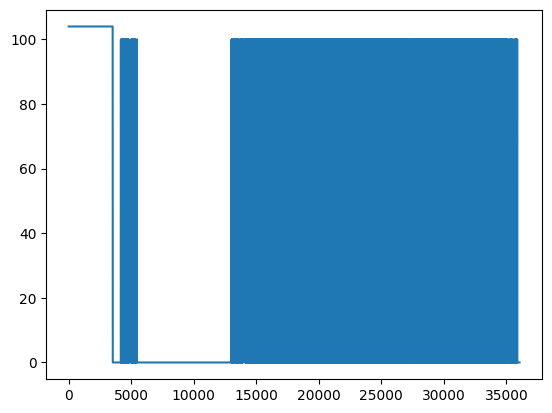

In [ ]:
plt.plot(df_race_car_data["brake"])

In [ ]:
df_race_laps_data["date_start"][1]

Timestamp('2023-03-05 15:05:17.858000+0000', tz='UTC')

In [ ]:
lap1start_time = df_race_laps_data["date_start"][1]

race_start_lap_index = data_closest_timestamp(lap1start_time, df_race_car_data)

race_end_lap_index = data_closest_timestamp(lap1start_time + df_race_laps_data["lap_duration"][1], df_race_car_data)

start_time = df_race_car_data["date"][race_start_lap_index]
df_race_time = df_race_car_data["date"][race_start_lap_index:race_end_lap_index].apply(lambda x: (x - start_time).total_seconds())

df_race_time

14449     0.00
14450     0.28
14451     0.56
14452     0.88
14453     1.12
         ...  
14808    96.96
14809    97.12
14810    97.36
14811    97.56
14812    97.76
Name: date, Length: 364, dtype: float64

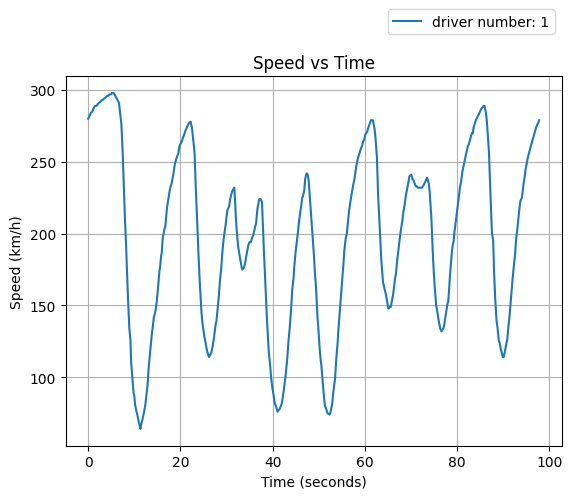

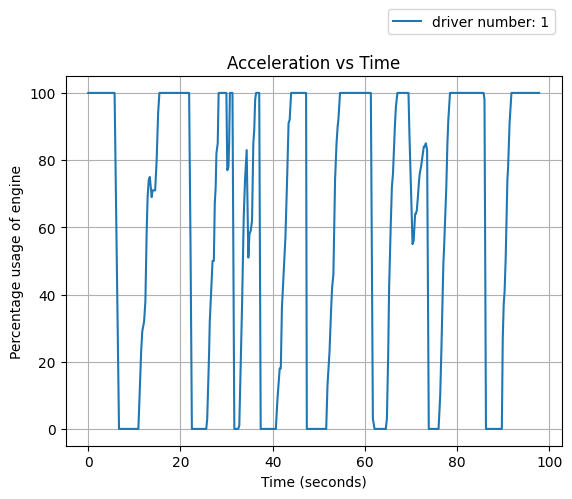

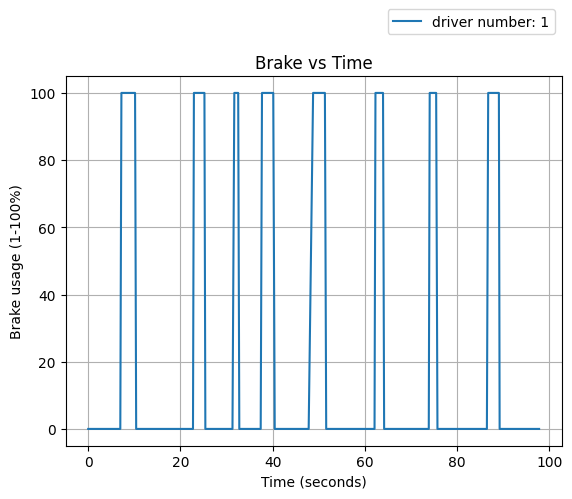

In [ ]:
plt.plot(df_race_time,  df_race_car_data["speed"][race_start_lap_index:race_end_lap_index])

plt.legend([f"driver number: {driver_number}"], bbox_to_anchor=(1.0, 1.20), ncol=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Speed (km/h)")
plt.title("Speed vs Time")
plt.grid(True)
plt.show()

plt.plot(df_race_time,  df_race_car_data["throttle"][race_start_lap_index:race_end_lap_index])

plt.legend([f"driver number: {driver_number}"], bbox_to_anchor=(1.0, 1.20), ncol=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Percentage usage of engine")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.show()

plt.plot(df_race_time,  df_race_car_data["brake"][race_start_lap_index:race_end_lap_index])

plt.legend([f"driver number: {driver_number}"], bbox_to_anchor=(1.0, 1.20), ncol=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Brake usage (1-100%)")
plt.title("Brake vs Time")
plt.grid(True)
plt.show()

# PORÓWNANIE - WYŚCIG VS KWALIFIKACJE

In [ ]:
diff = df_race_time.shape[0] - df_qualifying_time.shape[0]
adjusted_df_race_time = df_race_time.iloc[:df_race_time.shape[0] - diff]
adjusted_race_end_lap_index = race_end_lap_index - diff

In [ ]:
adjusted_race_end_lap_index

14793

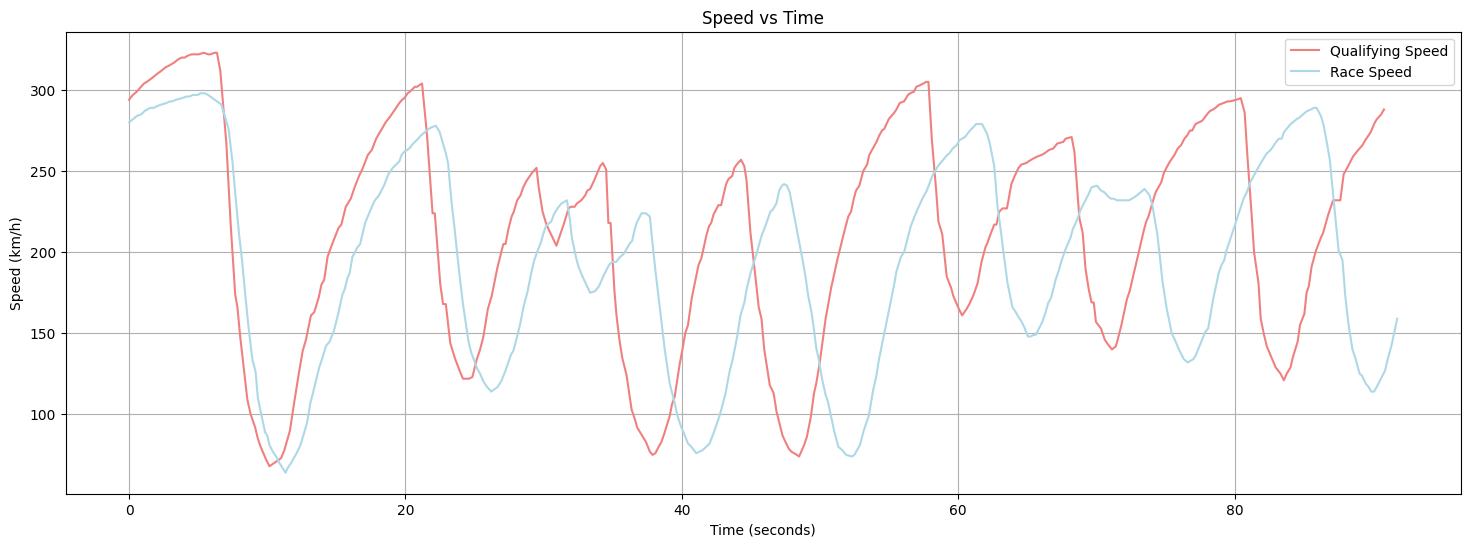

In [ ]:
plt.figure(figsize=(18, 6))

plt.plot(df_qualifying_time,  
         df_qualifying_car_data["speed"][qualifying_start_lap_index:qualifying_end_lap_index], 
         c='lightcoral', label="Qualifying Speed")

plt.plot(adjusted_df_race_time,  
         df_race_car_data["speed"][race_start_lap_index:adjusted_race_end_lap_index], 
         c='lightblue', label="Race Speed")

plt.xlabel("Time (seconds)")
plt.ylabel("Speed (km/h)")
plt.title("Speed vs Time")
plt.legend()
plt.grid(True)
plt.show()

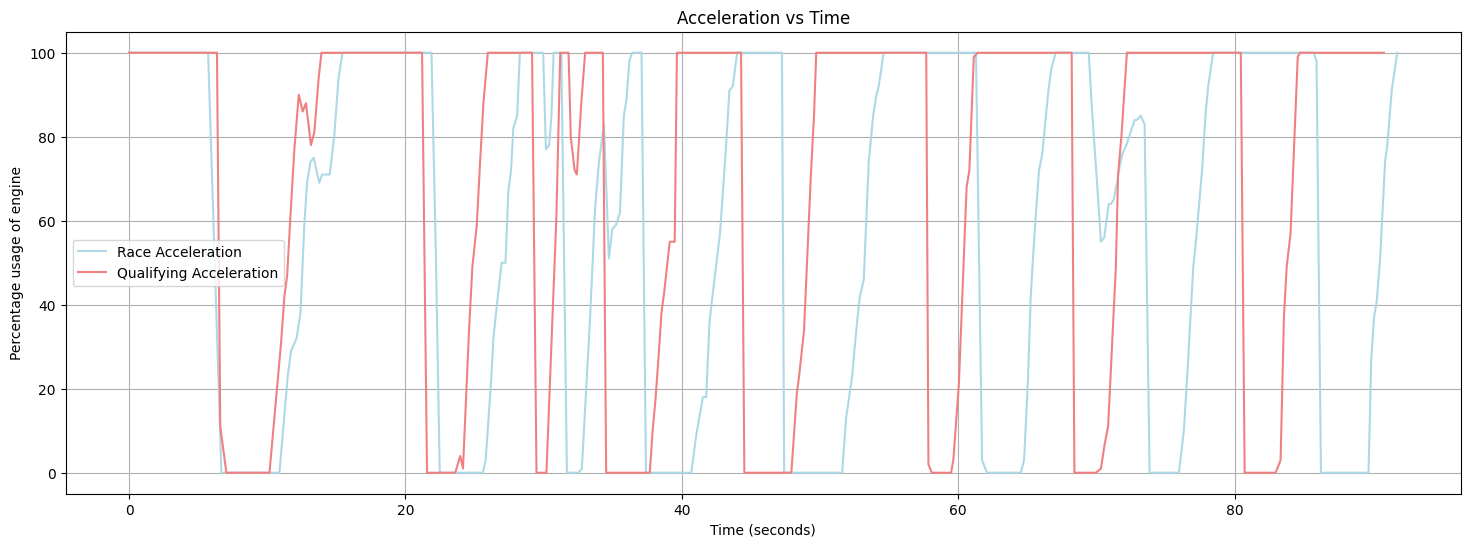

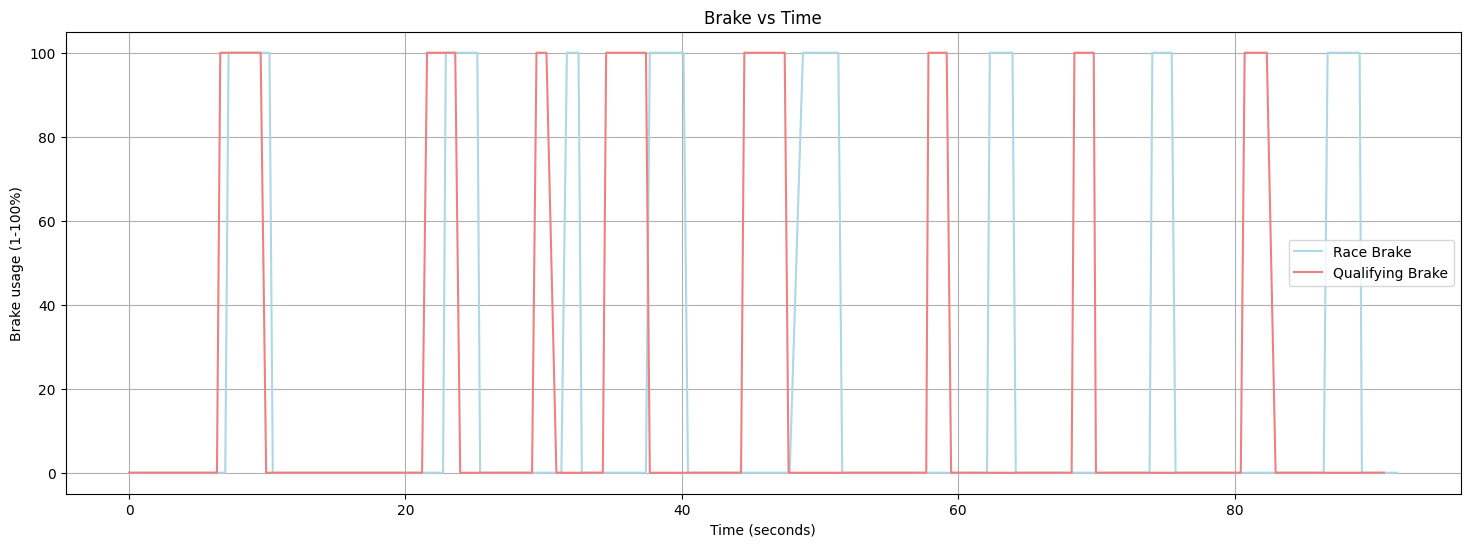

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(adjusted_df_race_time,  df_race_car_data["throttle"][race_start_lap_index:adjusted_race_end_lap_index], c='lightblue', label="Race Acceleration")
plt.plot(df_qualifying_time,  df_qualifying_car_data["throttle"][qualifying_start_lap_index:qualifying_end_lap_index], c='lightcoral', label="Qualifying Acceleration")

plt.xlabel("Time (seconds)")
plt.ylabel("Percentage usage of engine")
plt.title("Acceleration vs Time")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(18, 6))

plt.plot(adjusted_df_race_time,  df_race_car_data["brake"][race_start_lap_index:adjusted_race_end_lap_index], c='lightblue', label="Race Brake")
plt.plot(df_qualifying_time,  df_qualifying_car_data["brake"][qualifying_start_lap_index:qualifying_end_lap_index], c='lightcoral', label="Qualifying Brake")


plt.xlabel("Time (seconds)")
plt.ylabel("Brake usage (1-100%)")
plt.title("Brake vs Time")
plt.legend()
plt.grid(True)
plt.show()

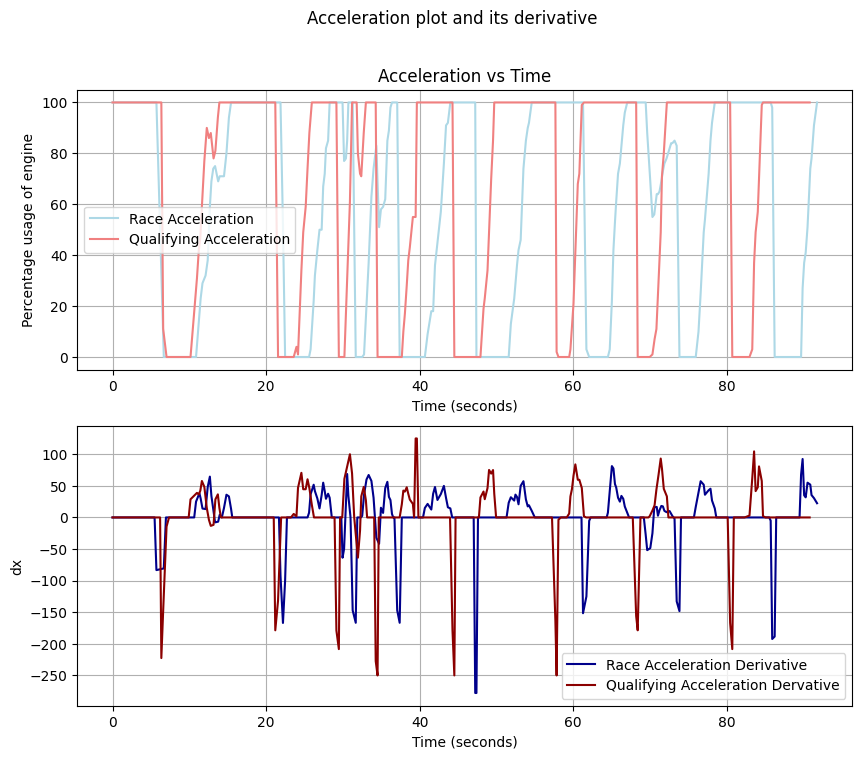

<Figure size 1800x600 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Acceleration plot and its derivative')

# Wykres funkcji
plt.figure(figsize=(18, 6))

ax1.plot(adjusted_df_race_time,  df_race_car_data["throttle"][race_start_lap_index:adjusted_race_end_lap_index], c='lightblue', label="Race Acceleration")
ax1.plot(df_qualifying_time,  df_qualifying_car_data["throttle"][qualifying_start_lap_index:qualifying_end_lap_index], c='lightcoral', label="Qualifying Acceleration")

ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Percentage usage of engine")
ax1.set_title("Acceleration vs Time")
ax1.legend()
ax1.grid()

# Wykres pochodnej
def compute_quali_derivative(telemetry1):

    dx = telemetry_computations.smooth_derivative(telemetry1["date"][qualifying_start_lap_index:qualifying_end_lap_index].apply(lambda x: (x - start_time).total_seconds())  ,telemetry1["throttle"][qualifying_start_lap_index:qualifying_end_lap_index])
    return dx

def compute_race_derivative(telemetry1):

    dx = telemetry_computations.smooth_derivative(telemetry1["date"][race_start_lap_index:adjusted_race_end_lap_index].apply(lambda x: (x - start_time).total_seconds())  ,telemetry1["throttle"][race_start_lap_index:adjusted_race_end_lap_index])
    return dx

dx_race = compute_race_derivative(df_race_car_data)
dx_qualifying = compute_quali_derivative(df_qualifying_car_data)

ax2.plot(adjusted_df_race_time, dx_race, label="Race Acceleration Derivative", c='darkblue')
ax2.plot(df_qualifying_time, dx_qualifying, label="Qualifying Acceleration Dervative", c='darkred')
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("dx")
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()